### Document Layout Detection Using Pre-trained Weights


image 1/1 D:\Python\ajit\Images.jpg: 640x480 1 Page-footer, 3 Page-headers, 4 Pictures, 3 Section-headers, 5 Tables, 26 Texts, 5 Titles, 775.2ms
Speed: 3.1ms preprocess, 775.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


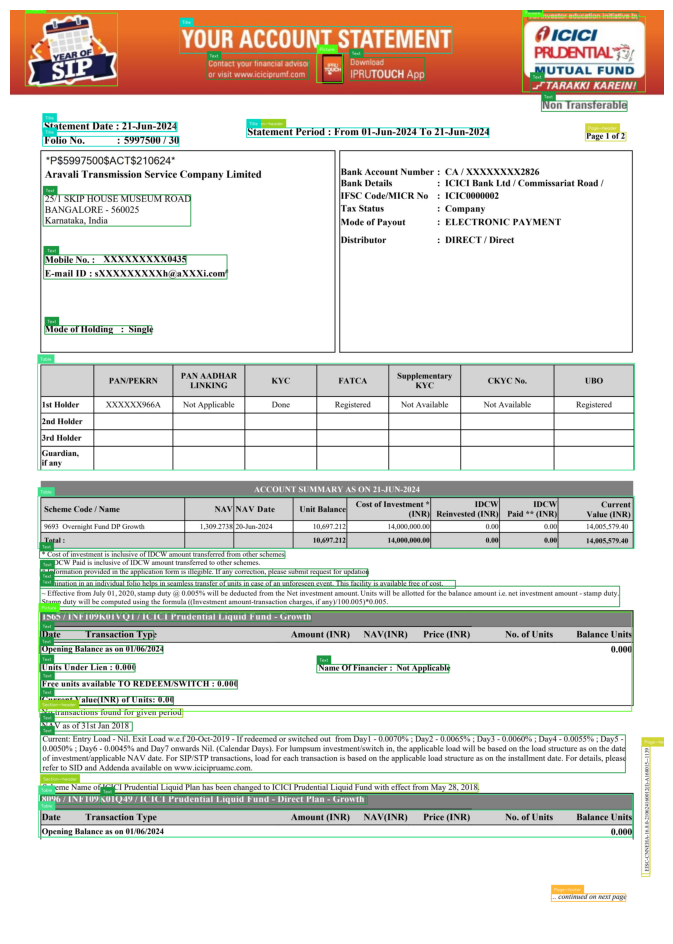

True

In [28]:
## Document Layout Detection Using Pre-trained Weights

from ultralytics import YOLOv10
import cv2
import supervision as sv
model = YOLOv10(r"D:\Python\ajit\yolov10x_best.pt")
image = cv2.imread(r"D:\Python\ajit\Images.jpg")

results = model(source=r'D:\Python\ajit\Images.jpg', conf=0.2, iou=0.8)[0]
# show results with "supervision" library

detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)
cv2.imwrite(r'D:\annoted_image1.jpg',annotated_image)

###  Convert the Pdf into Images

In [ ]:
###  Convert the Pdf into Images

import fitz  # PyMuPDF, imported as fitz for backward compatibility reasons
file_path = r"D:\Python\ajit\21813213.pdf"
doc = fitz.open(file_path)  # open document
for i, page in enumerate(doc):
    pix = page.get_pixmap()  # render page to an image
    pix.save(f"pdf3_{i}.png")

### Notes:-
#### Used labelImg for YOLO Labeling
#### setup on Pycharm

## Trained The Yolov10 Model on Custom DataSets

In [73]:
## Trained The Yolov10 Model on Custom DataSets

!yolo task=detect mode=train epochs=15 batch=4 plots=True \
model="D:\Python\ajit\yolov10x_best.pt" \
data="D:\Python\ajit\doclaynet.yaml"


New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.11.1 torch-2.3.1+cpu CPU (12th Gen Intel Core(TM) i5-1245U)
engine\trainer: task=detect, mode=train, model=D:\Python\ajit\yolov10x_best.pt, data=D:\Python\ajit\doclaynet.yaml, epochs=15, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina


train: Scanning D:\Python\ajit\train\labels\train...:   0%|          | 0/7 [00:00<?, ?it/s]
train: Scanning D:\Python\ajit\train\labels\train... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 144.12it/s]

val: Scanning D:\Python\ajit\train\labels\val...:   0%|          | 0/1 [00:00<?, ?it/s]
val: Scanning D:\Python\ajit\train\labels\val... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 189.33it/s]

  0%|          | 0/2 [00:00<?, ?it/s]
       1/15         0G      1.911      8.355      1.748      1.853       8.48      1.701         66        640:   0%|          | 0/2 [00:53<?, ?it/s]
       1/15         0G      1.911      8.355      1.748      1.853       8.48      1.701         66        640:  50%|█████     | 1/2 [00:53<00:53, 53.50s/it]
       1/15         0G      1.844      7.675      1.515      1.891      7.647      1.542         47        640:  50%|█████     | 1/2 [01:09<00:53, 53.50s/it]
       1/15         0G      1.844      7.675 

In [72]:
from pathlib import Path
import os
path1 = r"D:\Python\ajit\train\images\train"
path2 = r"D:\Python\ajit\result"


for i in os.listdir(path1):
    img_path = os.path.join(path1,i)
    img = cv2.imread(img_path)
    model = YOLOv10(r"D:\Python\ajit\yolov10x_best.pt")
    results = model(source=img_path, conf=0.2, iou=0.8)[0]

    detections = sv.Detections.from_ultralytics(results)

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)
    
    result_img_path = os.path.join(path2,i)
    results.save(Path(result_img_path))

    

    # print(img_path)
    # print(i)



image 1/1 D:\Python\ajit\train\images\train\images.jpg: 640x480 1 Page-footer, 3 Page-headers, 4 Pictures, 3 Section-headers, 5 Tables, 26 Texts, 5 Titles, 751.5ms
Speed: 0.0ms preprocess, 751.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



image 1/1 D:\Python\ajit\train\images\train\pdf1_0.png: 640x480 1 Page-footer, 2 Page-headers, 5 Pictures, 6 Section-headers, 4 Tables, 20 Texts, 1 Title, 732.3ms
Speed: 3.0ms preprocess, 732.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



image 1/1 D:\Python\ajit\train\images\train\pdf1_1.png: 640x480 2 Page-headers, 4 Pictures, 4 Section-headers, 1 Table, 7 Texts, 801.5ms
Speed: 9.5ms preprocess, 801.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



image 1/1 D:\Python\ajit\train\images\train\pdf2_0.png: 640x480 1 Page-footer, 2 Page-headers, 6 Pictures, 6 Section-headers, 4 Tables, 24 Texts, 2 Titles, 963.2ms
Speed: 7.2ms preprocess, 963.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



image 1/1 D:\Python\ajit\train\images\train\pdf2_1.png: 640x480 2 Page-headers, 3 Pictures, 7 Section-headers, 3 Tables, 16 Texts, 901.3ms
Speed: 4.0ms preprocess, 901.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



image 1/1 D:\Python\ajit\train\images\train\pdf3_0.png: 640x480 2 Page-footers, 1 Page-header, 4 Pictures, 6 Section-headers, 4 Tables, 16 Texts, 1 Title, 803.0ms
Speed: 1.9ms preprocess, 803.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



image 1/1 D:\Python\ajit\train\images\train\pdf3_1.png: 640x480 1 Caption, 2 Page-headers, 4 Pictures, 4 Section-headers, 4 Tables, 13 Texts, 733.9ms
Speed: 0.0ms preprocess, 733.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [ ]:
#model_path = '/content/runs/detect/train/weights/best.pt'
#model = YOLOv10(model_path)
#results = model(source='/content/Fire-Detection-1/test/images', conf=0.25,save=True)

In [75]:
#

### YOLOv8 Setup

In [81]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO(r"C:\Users\30134894\Downloads\yolov8n.pt")  # load a pretrained YOLOv8n detection model
model.train(data=r'D:\Python\ajit\doclaynet.yaml', epochs=3)  # train the model

New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.11.1 torch-2.3.1+cpu CPU (12th Gen Intel Core(TM) i5-1245U)
engine\trainer: task=detect, mode=train, model=C:\Users\30134894\Downloads\yolov8n.pt, data=D:\Python\ajit\doclaynet.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

train: Scanning D:\Python\ajit\train\labels\train.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
val: Scanning D:\Python\ajit\train\labels\val.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      2.916      4.075      2.318        113        640: 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all          1         10     0.0139     0.0556     0.0137     0.0041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      2.893       4.18      2.371        120        640: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          1         10     0.0167     0.0556     0.0138    0.00415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      3.324      4.172      2.634        153        640: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all          1         10     0.0185     0.0556     0.0146    0.00292



3 epochs completed in 0.004 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.11.1 torch-2.3.1+cpu CPU (12th Gen Intel Core(TM) i5-1245U)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


                   all          1         10     0.0167     0.0556     0.0138    0.00415
               Caption          1          2          0          0          0          0
              Footnote          1          6       0.05      0.167     0.0415     0.0125
               Formula          1          2          0          0          0          0
Speed: 9.9ms preprocess, 102.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000226549150D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          


image 1/1 D:\Python\ajit\Images.jpg: 640x480 (no detections), 81.0ms
Speed: 6.5ms preprocess, 81.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


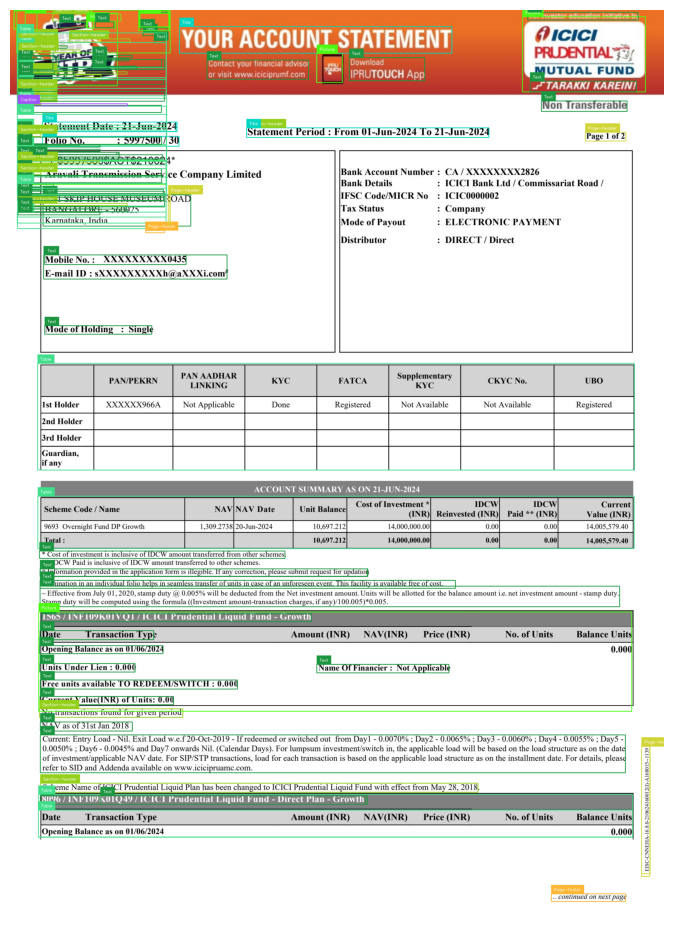

In [88]:
model = YOLO(r"C:\Users\30134894\Downloads\yolov8n.pt")
#model = YOLO(r"C:\Users\30134894\Downloads\yolo-doclaynet.pt")
results = model.predict(source=r'D:\Python\ajit\Images.jpg', conf=0.1)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
from pathlib import Path
import os
path1 = r"D:\Python\ajit\train\images\train"
path2 = r"D:\Python\ajit\result"


for i in os.listdir(path1):
    img_path = os.path.join(path1,i)
    img = cv2.imread(img_path)
    model = YOLO(r"C:\Users\30134894\Downloads\yolov8n.pt")
    results = model(source=img_path, conf=0.2, iou=0.8)[0]

    detections = sv.Detections.from_ultralytics(results)

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)
    
    result_img_path = os.path.join(path2,i)
    results.save(Path(result_img_path))

    

    # print(img_path)
    # print(i)


C:\Users\30134894\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



image 1/1 D:\Python\ajit\Images.jpg: 640x480 1 Page-footer, 3 Page-headers, 4 Pictures, 3 Section-headers, 5 Tables, 26 Texts, 5 Titles, 1150.1ms
Speed: 17.4ms preprocess, 1150.1ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 480)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


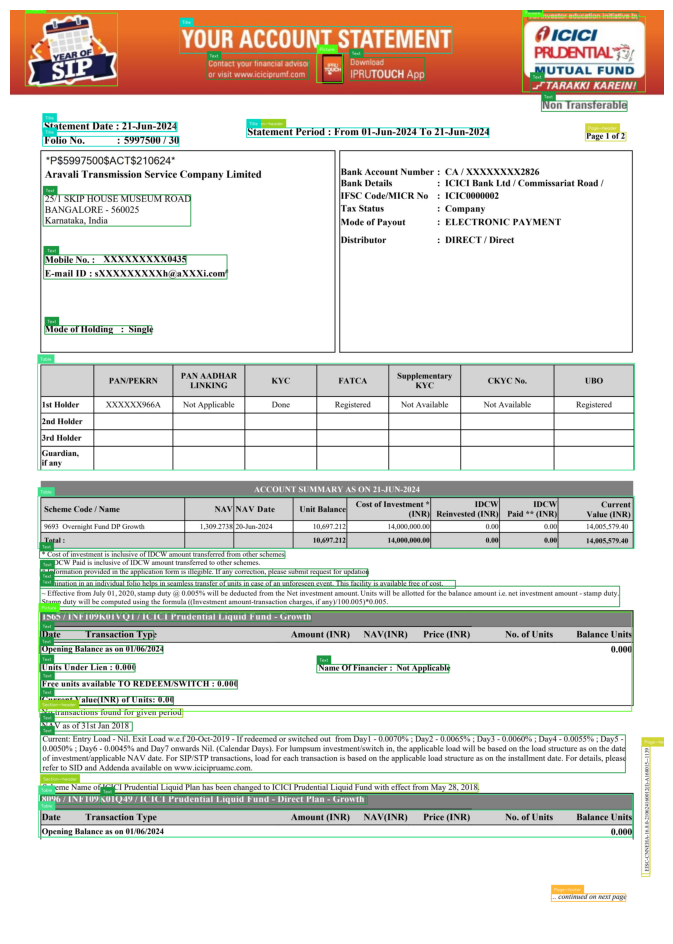

True

In [26]:
## Document Layout Detection Using Pre-trained Weights

from ultralytics import YOLOv10
import cv2
import supervision as sv
model = YOLOv10(r"D:\Python\ajit\yolov10x_best.pt")
image = cv2.imread(r"D:\Python\ajit\Images.jpg")

results = model(source=r'D:\Python\ajit\Images.jpg', conf=0.2, iou=0.8)[0]
# show results with "supervision" library

detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)
cv2.imwrite(r'D:\annoted_image1.jpg',annotated_image)

In [31]:
detections

Detections(xyxy=array([[     55.984,      11.095,      391.33,      276.17],
       [     110.13,      2641.7,      2241.4,      2779.9],
       [     1935.1,      331.48,      2247.6,      369.45],
       [      120.8,       673.7,      658.12,      787.28],
       [     107.86,        1972,      1001.6,      1998.8],
       [     109.64,      2099.3,      2220.2,      2174.6],
       [     100.02,      1287.9,      2274.9,      1676.4],
       [     1971.4,      3220.7,      2242.5,      3248.1],
       [     1117.2,      158.03,      1210.3,      264.01],
       [     109.08,      2036.3,      1301.9,      2064.7],
       [     115.42,      2200.1,      1097.1,      2228.2],
       [     717.69,      182.41,      1087.6,      252.59],
       [     110.38,      2817.4,      1704.5,      2850.7],
       [     110.85,      2594.2,      445.98,      2627.7],
       [     110.74,      2036.2,      1303.5,      2063.7],
       [     122.14,      892.07,      790.43,      980.24],
       [

In [34]:
results.save_crop(r'D:\Python\ajit\text_extract\crop')

In [30]:
detections[0][0]

Detections(xyxy=array([[     55.984,      11.095,      391.33,      276.17]], dtype=float32), mask=None, confidence=array([    0.93889], dtype=float32), class_id=array([6]), tracker_id=None, data={'class_name': array(['Picture'], dtype='<U14')})

In [53]:
results.probs

{0: 'Caption',
 1: 'Footnote',
 2: 'Formula',
 3: 'List-item',
 4: 'Page-footer',
 5: 'Page-header',
 6: 'Picture',
 7: 'Section-header',
 8: 'Table',
 9: 'Text',
 10: 'Title'}

In [108]:
# !pip install pytesseract

In [9]:
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\30134894\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

In [69]:
path1 = r"D:\Python\ajit\text_extract\crop\Text"
txt_t = []
for i in os.listdir(path1):
    img_path = os.path.join(path1,i)
    text = (pytesseract.image_to_string(Image.open(img_path)))
    txt_t.append(text)
    # print(img_path)
    # print(i)

In [91]:
path1 = r"D:\Python\ajit\text_extract\crop\Text"
txt_t = []
for i in os.listdir(path1):
    img_path = os.path.join(path1,i)
    text = (pytesseract.image_to_string(Image.open(img_path)))

    text1 = text.replace('\n',' ')
    txt_t.append(text1)
    # print(img_path)
    # print(i)

In [92]:
txt_t

['Current: Entry Load - Nil. Exit Load w.e.f 20-Oct-2019 - If redeemed or switched out from Day! - 0.0070% ; Day2 - 0.0065% ; Day3 - 0.0060% ; Day4 - 0.0055% ; Day5 -  0.0050% ; Day6 - 0.0045% and Day7 onwards Nil. (Calendar Days). For lumpsum investment/switch in, the applicable load will be based on the load structure as on the date of investment/applicable NAV date. For SIP/STP transactions, load for each transaction is based on the applicable load structure as on the installment date. For details, please refer to SID and Addenda available on www.icicipruamc.com. ',
 '# Information provided in the application form is illegible. If any correction, please submit request for updation ',
 'Mobile No.: XXXXXXXXX0435 E-mail ID : sXXXXXXXXXh@aXXXi.com* ',
 'Units Under Lien : 0.000 ',
 'Download  IPRUTOUCH App ',
 'Free units available TO REDEEM/SWITCH : 0.000 ',
 'An investor education initiative by  ',
 'No transactions found for given period. ',
 'Mode of Holding : Single ',
 '= 8096 / 

In [90]:
text1 = text

text2 = text1.replace('\n'," ")
text2

'NAV as of 31st Jan 2018 : '

In [82]:
# for i in txt_t:
#     print(i)
#     # extracted_data = extract_info(i,keywords)
#     # print(extracted_data)

# # df = pd.DataFrame(list(extracted_data.items()), columns=['Keyword','Information'])
# # df
#     # print(i)

In [83]:
# import re
# import pandas as pd
# def extract_info(text,keywords):
#     info_dict = {}
#     for keyword in keywords:
#         pattern = re.compile(rf"\b{keyword}\b\s*[:\--]\s*(.*?)(?:\n|$)", re.IGNORECASE)
#         matches = pattern.findall(text)
        
#         if matches:
#             info_dict[keyword] = matches[0].strip()
#         else:
#             info_dict[keyword] = 'Not found'
#     return info_dict

# keywords = ['Mobile No.','Opening Balance','Mode of Holding','Liquid Fund']

# extracted_data = extract_info(text,keywords)

# df = pd.DataFrame(list(extracted_data.items()), columns=['Keyword','Information'])
# df

In [73]:
# def extract_info_from_text(text_list, keywords):
#     extracted_info = {}
    
#     for keyword in keywords:
#         extracted_info[keyword] = []
#         for text in text_list:
#             if keyword.lower() in text.lower():
#                 extracted_info[keyword].append(text)
    
#     return extracted_info

In [93]:
def extract1_text(text_list, keywords):
    data = []
    for keyword in keywords:
        for text in text_list:
            if keyword.lower() in text.lower():
                cleaned_text = text.lower().replace(keyword.lower(),'')
                data.append({'Keywords': keyword,'Text' :cleaned_text})

    return pd.DataFrame(data)

In [163]:
keywords = ['Mobile No.','Opening Balance','Mode of Holding','Liquid Fund','Current Value(INR) of Units','Free units available TO REDEEM/SWITCH']

df = extract1_text(txt_t,keywords)

In [84]:
txt_t

['Current: Entry Load - Nil. Exit Load w.e.f 20-Oct-2019 - If redeemed or switched out from Day! - 0.0070% ; Day2 - 0.0065% ; Day3 - 0.0060% ; Day4 - 0.0055% ; Day5 -\n\n0.0050% ; Day6 - 0.0045% and Day7 onwards Nil. (Calendar Days). For lumpsum investment/switch in, the applicable load will be based on the load structure as on the date\nof investment/applicable NAV date. For SIP/STP transactions, load for each transaction is based on the applicable load structure as on the installment date. For details, please\nrefer to SID and Addenda available on www.icicipruamc.com.\n',
 '# Information provided in the application form is illegible. If any correction, please submit request for updation\n',
 'Mobile No.: XXXXXXXXX0435\nE-mail ID : sXXXXXXXXXh@aXXXi.com*\n',
 'Units Under Lien : 0.000\n',
 'Download\n\nIPRUTOUCH App\n',
 'Free units available TO REDEEM/SWITCH : 0.000\n',
 'An investor education initiative by\n\n',
 'No transactions found for given period.\n',
 'Mode of Holding : Singl

In [143]:
list1 = ['81565 /INF109K01VQ1 / ICICI Prudential Liquid Fund - Growth\n',
         '= 8096 / INF109K01Q49 / ICICI Prudential Liquid Fund - Direct Plan - Growth\n']

In [139]:
l1 = []
for i in str1.split():
    if i.startswith("INF"):
        l1.append(i)

    # print(i)
l1

['INF109K01Q49']

In [157]:
#list2 = ['81565 /INF109K01VQ1 / ICICI Prudential Liquid Fund - Growth\n',]
list3 = ['= 8096 / INF109K01Q49 / ICICI Prudential Liquid Fund - Direct Plan - Growth\n']

In [161]:
l2 = []
for i in txt_t:
    for j in i.split('/'):
        if j.startswith('INF') or j.startswith(' INF'):
            l2.append(j)
        # print(j)
     
    # print(i)
l2

[' INF109K01Q49 ', 'INF109K01VQ1 ']

In [162]:
path1 = r"D:\Python\ajit\text_extract\crop\Table"
table = []
for i in os.listdir(path1):
    img_path = os.path.join(path1,i)
    text = (pytesseract.image_to_string(Image.open(img_path)))

    text1 = text.replace('\n',' ')
    print(text1)
    # txt_t.append(text1)
    # print(img_path)
    # print(i)

PAN/PEKRN IN a ee FATCA Supplementary  LINKING CKYC No.  
Cost of Investment * IDCW IDCW| Current Scheme Code / Name NAV Date (INR)] Reinvested teed Paid ** Ne Value ne  9693 Overnight Fund DP Growth 1,309.2738] 20-Jun-2024 10,697.212 14,000,000. of = .00 14, | _-14,005,579.40 | 579.40  
1565 / INF109K01VQ1 / ICICI Prudential Liquid Fund - Growth Amount (INR) NAV(INR) Price (INR)  Date Transaction Type  Opening Balance as on 01/06/2024  Units Under Lien : 0.000  Free units available TO REDEEM/SWITCH : 0.000 Current Value(INR) of Units: 0.00  "Ki & tenner tae TAe eon ewan  Name Of Financier : Not Applicable  No. of Units  Balance Units  
8096 / INF109K010Q49 / ICICI Prudential Liquid Fund - Direct Plan - Growth  Date Transaction Type Amount (INR) NAV(INR) _ Price (INR) No. of Units Balance Units Opening Balance as on 01/06/2024 0.000  
Opening Balance as on 01/06/2024 0.000 


In [164]:
df

,Keywords,Text
0,Mobile No.,: xxxxxxxxx0435 e-mail id : sxxxxxxxxxh@axxxi....
1,Mobile No.,: xxxxxxxxx0435
2,Opening Balance,as on 01/06/2024
3,Mode of Holding,: single
4,Liquid Fund,= 8096 / inf109k01q49 / icici prudential - di...
5,Liquid Fund,1k01q49 / icici prudential - direct plan - gr...
6,Liquid Fund,81565 /inf109k01vq1 / icici prudential - growth
7,Current Value(INR) of Units,: 0.00
8,Free units available TO REDEEM/SWITCH,: 0.000


In [224]:
for index , row in df.iterrows():
    # print(index)
    # print(row)
    l2 = []
    for i in row.values:
        m = i.split()
        for l in m:
            k = l.replace('/',' ')
            l2.append(k)
            # if k.startswith('inf') or k.startswith(' inf'):
                # l2.append(k)
            # print(l)
        # print(m)
        # print(i)
        # print(i)
        # print(row.values)
        # for j in i.split('/'):
        #     print(j[0][0])
        #     if j.startswith('inf') or j.startswith(' inf'):
        #         l2.append(j)



    # for i in text1:
    #      print(i)

In [226]:
l2

['Free', 'units', 'available', 'TO', 'REDEEM SWITCH', ':', '0.000']

In [ ]:
for keyword in keywords:
        for text in text_list:
            if keyword.lower() in text.lower():
                cleaned_text = text.lower().replace(keyword.lower(),'')
                data.append({'Keywords': keyword,'Text' :cleaned_text})

In [101]:
# !pip install "C:\Users\30134894\Downloads\en_core_web_sm-3.7.1-py3-none-any.whl"

In [10]:
file = r"D:\Python\ajit\Images.jpg" 

print(pytesseract.image_to_string(Image.open(file)))

YOUR ACCOUNT STATEMENT

ontact you ancial advisor ey Download

of visit www.iciciprumt.com | ®” |PRUTOUCH App MUTUAL FUND
s TARAKKI KAREIN!

Non Transferable

Statement Date 2 21-Jm-2i24 Statement Period : From 01-Jun-2024 To 21-Jun-2024 Pave lof?
FolioNo. ——_: 5997500/30 8

*P$5997500$ACT$210624*

Aravali Transmission Service Company Limited Bank Account Number : CA / XXXXXXXX2826
Bank Details : ICICI Bank Ltd / Commissariat Road /

25/1 SKIP HOUSE MUSEUM ROAD IFSC Code/MICR No: ICIC0000002
BANGALORE - 560025 Tax Status : Company

Karnataka, India Mode of Payout : ELECTRONIC PAYMENT
Distributor : DIRECT / Direct

Mobile No.: XXXXXXXXX0435
E-mail ID : sXXXXXXXXXh@aXXXi.com*

Mode of Holding : Single

PAN AADHAR Supplementary

1st Holder XXXXXX966A Not Applicable Not Available Not Available

ACCOUNT SUMMARY AS ON 21-JUN-2024

Cost of Investment * IDCW IDCW Current
Scheme Code / Name NAV Date (INR)| Reinvested (INR)| Paid ** (INR) Value —

9693. Overnight Fund DP Growth 1,309.2738 10,697

In [102]:
# !pip install camelot-py

In [101]:
import camelot

In [25]:
import camelot

# Path to the PDF file
pdf_path = r"D:\Python\ajit\27518261.pdf"

# Extract tables from the PDF file using 'stream' flavor
tables = camelot.read_pdf(pdf_path, pages='2', flavor='stream')

# Check if any tables were found
if tables:
    # Assuming the table we need is the first one found
    df = tables[0].df
    
    # Adjust the headers properly
    new_header = df.iloc[1]  # take the second row for headers
    df = df[2:]  # take the data less the header row
    df.columns = new_header  # set the header row as the df header

    # Print the DataFrame to inspect
    print("Extracted DataFrame:")
    print(df)

    # Save the DataFrame to a CSV file
    output_csv_path = r"D:\Python\ajit\text_extract\extracted_table2.csv"
    df.to_csv(output_csv_path, index=False)  # Ensure headers are included

    print(f"CSV file saved successfully to: {output_csv_path}")
else:
    print("No tables found in the PDF.")

Extracted DataFrame:
1                         Folio No.\n:\n27518261 / 74  \
2                            Units Under Lien : 0.000   
3       Free units available TO REDEEM/SWITCH : 0.000   
4                   Current Value(INR) of Units: 0.00   
5             No transactions found for given period.   
6                           NAV as of 31st Jan 2018 :   
7                                                       
8                                                       
9                   available on www.icicipruamc.com.   
10                                                      
11                          Bank Name\nAccount Number   
12                     Axis Bank Ltd\nXXXXXXXXXXX7884   
13                                                      
14  care helplines 1800 222 999/1800 200 6666(Mond...   

1                                                                Page 2 of 2  \
2                 Name Of Financier :  Not Applicable                          
3                   

In [2]:
# Useful libraries
from pdf2image import convert_from_path
from pytesseract import image_to_string

In [ ]:
images = r"D:\Python\ajit\Images.jpg"
    final_text = ""
    for pg, img in enumerate(images):
        
        final_text += convert_image_to_text(img)
        #print("Page n°{}".format(pg))
        #print(convert_image_to_text(img))

In [2]:
import cv2

In [11]:
image = r"D:\Python\ajit\Images.jpg"
img = cv2.imread(image)
# img_resize = img.resize(img,(140,240))
# cv2.imshow('image',img_resize)
# cv2.waitKey()
# cv2.DestroyAllWindows()

In [12]:
!pip install PyPDF2

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 232.6/232.6 kB 950.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import PyPDF2

In [17]:
def pdf_to_text(pdf_file: str) -> [str]:
    with open(pdf_file,'rb') as pdf:
        reader = PyPDF2.PdfReader(pdf, strict=False)
        pdf_text = []

        for page in reader.pages:
            content = page.extracted_text()
            pdf_text.append(content)

    return pdf_text


if __name__ == "__main__" :
    extracted_text = pdf_to_text(r'D:\Python\ajit\27518261.pdf')
    for text in extracted_text:
        print(text)


AttributeError: 'PageObject' object has no attribute 'extracted_text'

In [18]:
import os
import PyPDF2
import pytesseract
from PIL import Image
from pdf2image import convert_from_path
 

In [21]:
# Path to the folder containing PDF files
input_folder = r"D:\Python\ajit\test_pdf"
 
# Path to the folder where text files will be saved
output_folder = r"D:\Python\ajit\text_extract"
 
# Path to the Tesseract OCR executable (change if necessary)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
 
# Get a list of all PDF files in the input folder
files = [f for f in os.listdir(input_folder) if f.endswith(".pdf")]
 
# Loop through each PDF file and convert it to text using OCR
for file in files:
    pdf_path = os.path.join(input_folder, file)
    txt_path = os.path.join(output_folder, os.path.splitext(file)[0] + ".txt")
 
    # Extract images from PDF and perform OCR on each image
    images = []
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
 
        for page_num in range(pdf_reader.numPages):
            page = pdf_reader.getPage(page_num)
            image = page.extract_images()[0]["obj"]
            images.append(Image.frombytes("RGB", image.size, image.data))
 
    # Perform OCR on images and extract text
    text = ""
    for image in images:
        text += pytesseract.image_to_string(image)
 
    # Save the extracted text to a text file
    with open(txt_path, "w", encoding="utf-8") as txt_file:
        txt_file.write(text)
 
print("Conversion complete!")

DeprecationError: reader.numPages is deprecated and was removed in PyPDF2 3.0.0. Use len(reader.pages) instead.

In [22]:
from PyPDF2 import PdfReader

reader = PdfReader(r"D:\Python\ajit\27518261.pdf")
number_of_pages = len(reader.pages)
page = reader.pages[0]
text = page.extract_text()

In [24]:
print(text)

EISC-CNNEHA-16.8.0-210624160002(I)-A168015--1139
... continued on next pageFolio No. 27518261 / 74:Statement Date : 21-Jun-2024
Page 1 of 2Statement Period : From 01-Jun-2024 To 21-Jun-2024
SURAJKIRAN SOLAR TECHNOLOGIES PVT LTD
16 A 20 Wea Main
Ajmal Khan Road Karol Bagh New Delhi
New Delhi - 110005
DELHI, IndiaTax StatusBank Account Number CA / XXXXXXXX0129
DIRECT / Direct
Mode of Holding Single:
:Mode of PayoutPrivate Limited Company:
Mobile No. : XXXXXXXXX 4085#
E-mail ID : aXXXXXXXXXXg @aXXXi .com#IFSC Code/MICR No ICIC0007717/380229079:
:
DistributorBank Details ICICI Bank Ltd / SCIENCE CITY /
AHMEDABAD:
ELECTRONIC PAYMENT:
Guardian,
if any3rd Holder2nd Holder1st HolderSupplementary
KYCCKYC No. UBO
XXXXXX055L Not ApplicableFATCA KYCPAN AADHAR
LINKINGPAN/PEKRN
Done Registered Not Available Not Available Registered
ACCOUNT SUMMARY AS ON 21-JUN-2024
Scheme Code / Name NAV Unit BalanceCurrent
 Value (INR)Cost of Investment *
(INR)IDCW
Reinvested (INR)IDCW
Paid ** (INR)NAV Date
363.235